In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
df=pd.read_csv(r"A:\Work Docs\DATA Set\House Pricing.csv", usecols=['GarageQual','FireplaceQu','SalePrice'])
df.sample(5)

,FireplaceQu,GarageQual,SalePrice
1029,NaN,TA,118000
918,TA,TA,238000
701,NaN,TA,140000
198,NaN,NaN,104000
16,TA,TA,149000


In [107]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [108]:
df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [109]:
df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

Text(0, 0.5, 'Number of houses')

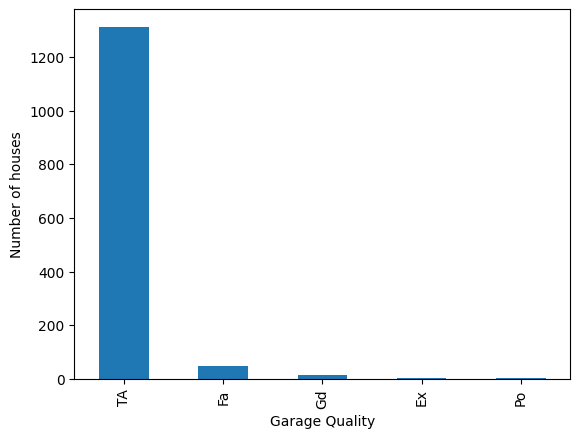

In [110]:

df['GarageQual'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Garage Quality')
plt.ylabel('Number of houses')

In [111]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

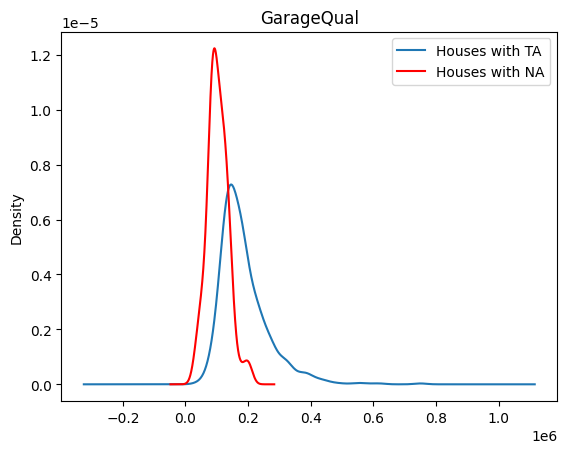

In [112]:
fig=plt.figure()
ax=fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax, color='red')

lines,labels=ax.get_legend_handles_labels()
labels=['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')


In [113]:
temp=df[df['GarageQual']=='TA']['SalePrice']
temp

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1311, dtype: int64

In [114]:
df['GarageQual'].fillna('TA',inplace=True)

<Axes: xlabel='GarageQual'>

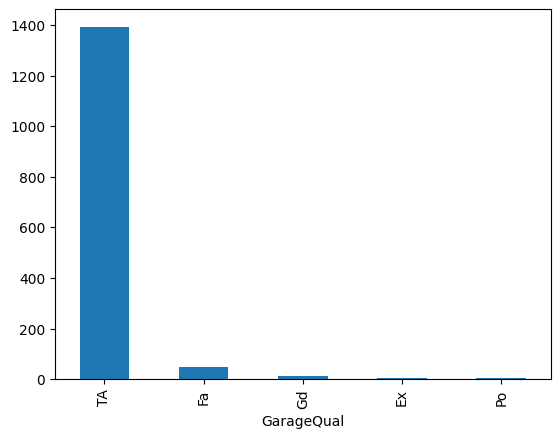

In [115]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

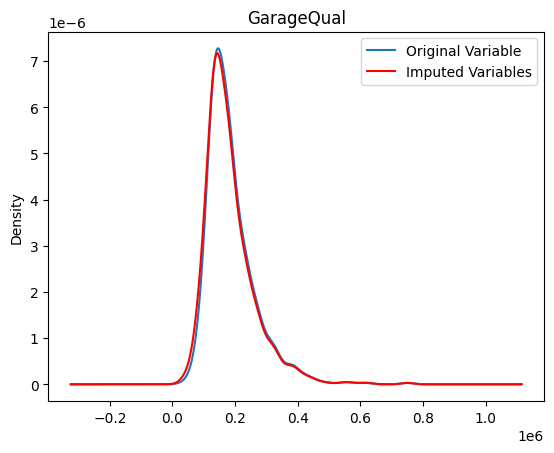

In [116]:
fig=plt.figure()
ax=fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)

#distribution of variable after imputation

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
labels=['Original Variable', 'Imputed Variables']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

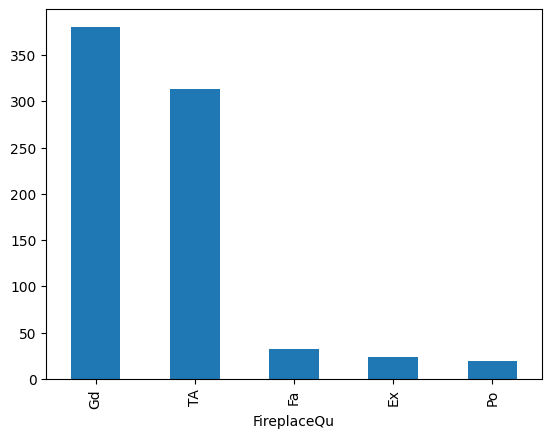

In [117]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [118]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

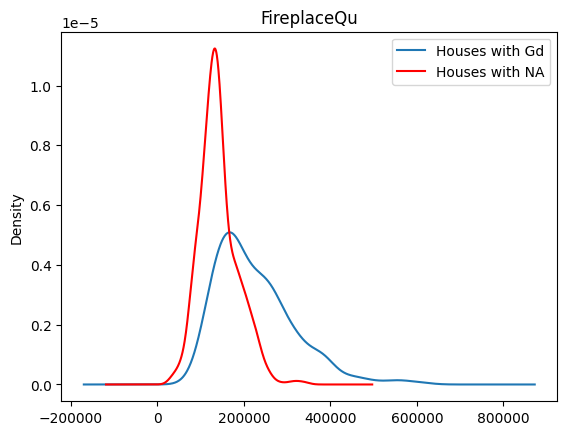

In [119]:
fig=plt.figure()
ax=fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax, color='red')

lines,labels=ax.get_legend_handles_labels()
labels=['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [120]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [121]:
df['FireplaceQu'].fillna('Gd',inplace=True)

<Axes: xlabel='FireplaceQu'>

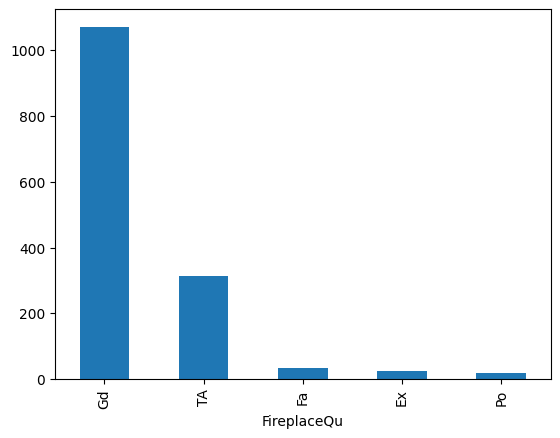

In [122]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

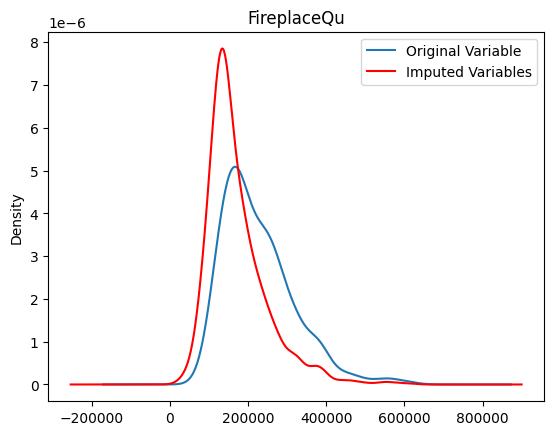

In [123]:
fig=plt.figure()
ax=fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)

#distribution of variable after imputation

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
labels=['Original Variable', 'Imputed Variables']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
x_train, x_test, y_train, y_test=train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [126]:
from sklearn.impute import SimpleImputer

In [127]:
imputer =SimpleImputer(strategy='most_frequent')

In [128]:
x_train=imputer.fit_transform(x_train)
x_test=imputer.fit_transform(x_train)

In [129]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)